In [17]:
import pandas as pd
#import files into DataFrames using pandas and perform merges as necessary
cabData = pd.read_csv('Cab_Data.csv')
cityData = pd.read_csv('City.csv')
customerData = pd.read_csv('Customer_ID.csv')
transactionData = pd.read_csv('Transaction_ID.csv')
transactionData = transactionData.merge(customerData, on="Customer ID", how='left')
cabData = cabData.merge(transactionData, on="Transaction ID", how="left")
#convert numeric columns to proper int format and separate month and year from date to make analysis easier
cityData.loc[:, 'Population'] = cityData['Population'].str.replace(',', '').astype(int)
cityData.loc[:, 'Users'] = cityData['Users'].str.replace(",", "").astype(int)
cabData.loc[:, 'Year'] = cabData['Date of Travel'].str.split("/").str[2]
cabData.loc[:, 'Month'] = cabData['Date of Travel'].str.split("/").str[0]
#remove null rows and duplicate transactions
cityData.dropna(subset=cityData.columns, inplace=True)
cabData.dropna(subset=cabData.columns, inplace=True)
cabData.drop_duplicates(subset=['Transaction ID'], inplace=True)
#print the data out for reference
print(cabData)
print(cityData)

        Transaction ID Date of Travel     Company           City  \
0             10000011       1/8/2016    Pink Cab     ATLANTA GA   
1             10000012       1/6/2016    Pink Cab     ATLANTA GA   
2             10000013       1/2/2016    Pink Cab     ATLANTA GA   
3             10000014       1/7/2016    Pink Cab     ATLANTA GA   
4             10000015       1/3/2016    Pink Cab     ATLANTA GA   
...                ...            ...         ...            ...   
359387        10440101       1/8/2018  Yellow Cab  WASHINGTON DC   
359388        10440104       1/4/2018  Yellow Cab  WASHINGTON DC   
359389        10440105       1/5/2018  Yellow Cab  WASHINGTON DC   
359390        10440106       1/5/2018  Yellow Cab  WASHINGTON DC   
359391        10440107       1/2/2018  Yellow Cab  WASHINGTON DC   

        KM Travelled  Price Charged  Cost of Trip  Customer ID Payment_Mode  \
0              30.45         370.95      313.6350        29290         Card   
1              28.62     

359392
359392


<Axes: xlabel='KM Travelled', ylabel='Price Charged'>

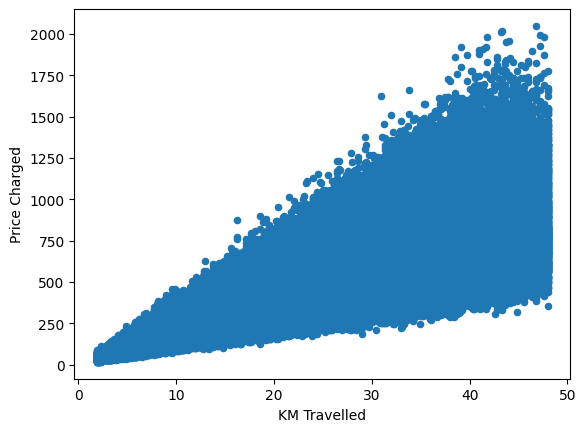

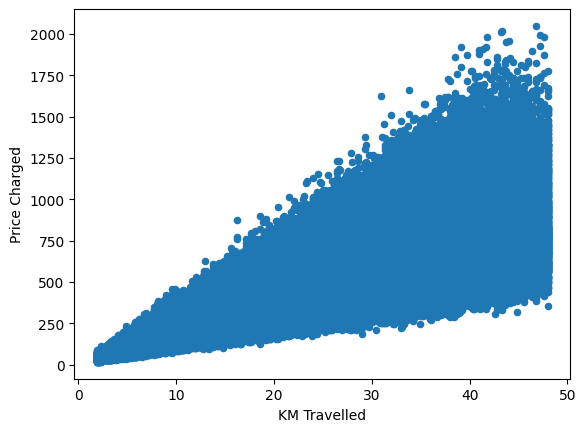

In [12]:
#First establish that the price charged is proportional to the distance traveled
cabData.plot(kind="scatter", x="KM Travelled", y="Price Charged")
#perform outlier detection based on distance traveled
firstQ = cabData['KM Travelled'].quantile(.25)
thirdQ = cabData['KM Travelled'].quantile(.75)
iqr = thirdQ - firstQ
for i in range(len(cabData['KM Travelled'])):
    if cabData['KM Travelled'][i] < firstQ - 1.5*iqr or cabData['KM Travelled'][i] > thirdQ + 1.5*iqr:
        cabData.drop([i])
cabData.plot(kind="scatter", x="KM Travelled", y="Price Charged")

<Axes: xlabel='City', ylabel='Average Amount Charged'>

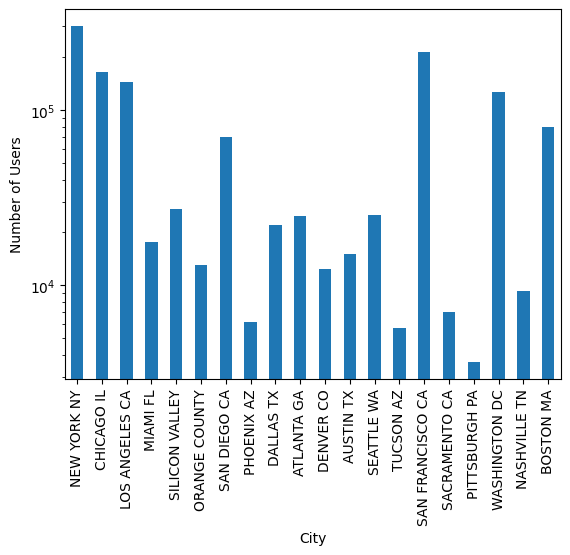

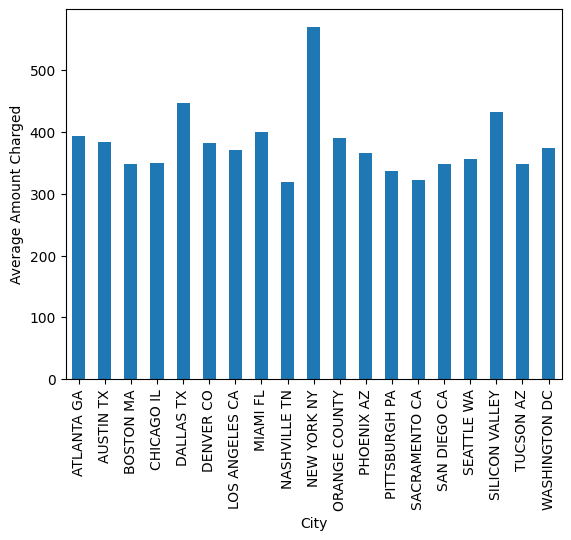

In [4]:
#Hypothesis No. 1 -- Does the number of customers affect the average cost of a cab in a city?
cityData.plot(kind="bar", x="City", y="Users", logy=True, xlabel="City", ylabel="Number of Users", legend=False)
pricePerCity = cabData.groupby('City')['Price Charged'].mean().reset_index()
pricePerCity.columns = ['City', 'Average Amount Charged']
pricePerCity.plot(kind="bar", x="City", y="Average Amount Charged", xlabel="City", ylabel="Average Amount Charged", legend=False)

<Axes: xlabel='City'>

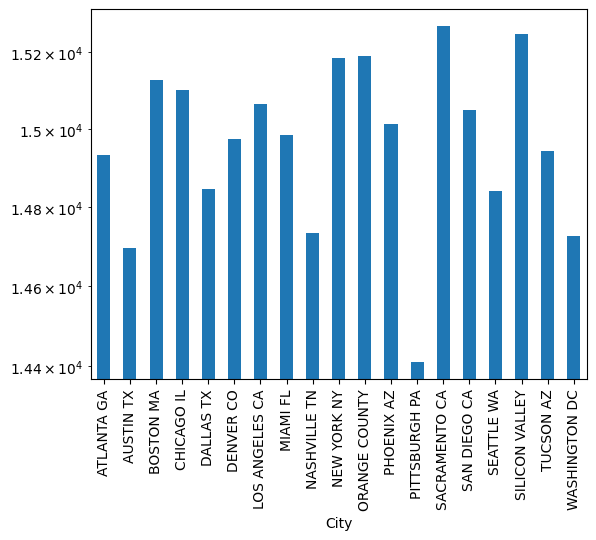

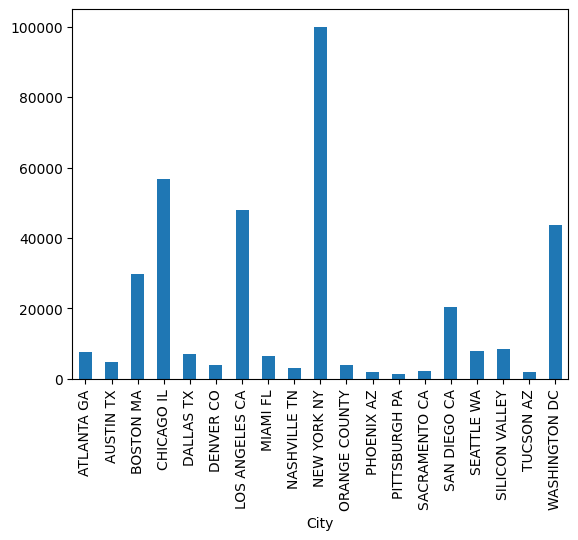

In [5]:
#Hypothesis No. 2 -- Does the average income affect the number of cabs requested in a city?
avgIncome = cabData.groupby('City')['Income (USD/Month)'].mean().reset_index()
avgIncome.columns = ['City', 'Average Income']
avgIncome.plot(kind='bar', x='City', y='Average Income', legend=False, logy=True)
numCabs = cabData.groupby('City').size().reset_index()
numCabs.columns = ['City', 'Number of Cabs']
numCabs.plot(kind='bar', x='City', y='Number of Cabs', legend=False)

<Axes: xlabel='City'>

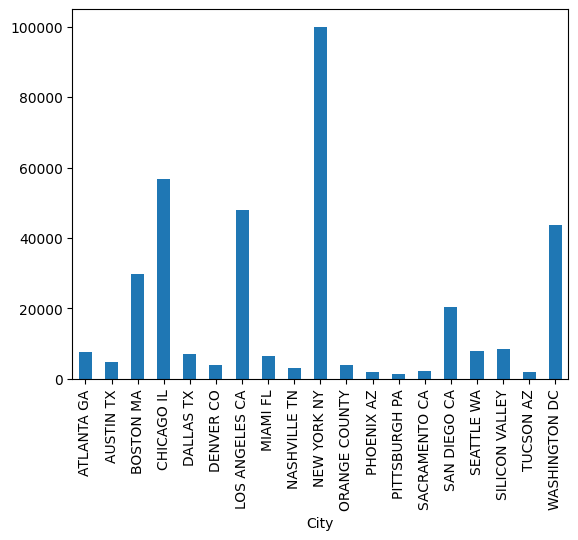

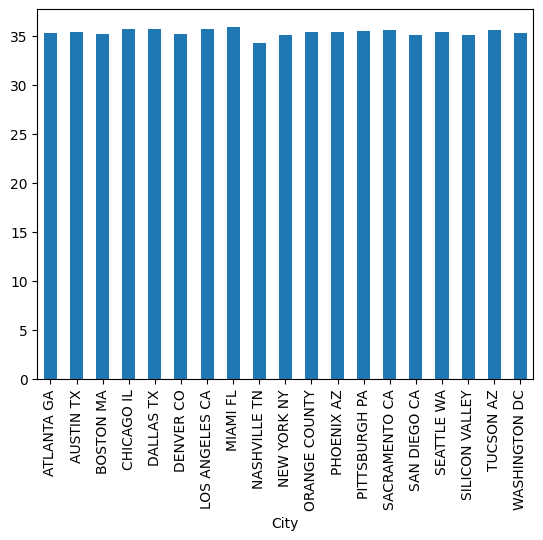

In [6]:
#Hypothesis No. 3 -- Does the average age of a city affect the number of cabs requested?
numCabs.plot(kind='bar', x='City', y='Number of Cabs', legend=False)
avgAge = cabData.groupby('City')['Age'].mean().reset_index()
avgAge.columns = ['City', 'Average Age']
avgAge.plot(kind='bar', x='City', y='Average Age', legend=False)